In [2]:
from itertools import count
from turtledemo.chaos import jumpto

import numpy as np
import pandas as pd

In [253]:
df=pd.read_csv('weights.csv')
X=df["x"].to_numpy()
y=df["y"].to_numpy()

In [48]:
from sklearn.model_selection import KFold
from scipy.interpolate import make_smoothing_spline 
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## TASK 1

In [57]:
class GaussianKernel:
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth
    def eval(self, x, x0):
        return np.exp(-np.square(x-x0) / (2 * np.square(self.bandwidth))) / (np.sqrt(2 * np.pi) * self.bandwidth)

class NW_ker_estimator:
    def __init__(self,h):
        self.Kernel=GaussianKernel(h)
    def fit(self,X,y):
        self.X=X
        self.y=y
    def predict(self,X):
        n_samples=X.shape[0]
        y=np.zeros(n_samples)
        for i in range(n_samples):
            weights=self.Kernel.eval(X[i],self.X)
            y_pred=np.dot(weights,self.y)/(np.sum(weights)+1e-9)
            y[i]=y_pred
        return y
        
        

In [80]:
def perform_cv_for_h(X,y,H,k=4):
    mses=np.array([])
    cv=KFold(n_splits=k,random_state=10,shuffle=True)
    for h in H:
        loc_mse=np.array([])
        for train_index, test_index in cv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model=NW_ker_estimator(h)
            model.fit(X_train,y_train)
            y_pred=model.predict(X_test)
            mse=mean_squared_error(y_test,y_pred)
            loc_mse=np.append(loc_mse,mse)
        mses=np.append(mses,np.mean(loc_mse))
    plt.title("h vs MSE")
    plt.xlabel("h value")
    plt.ylabel("mean MSE")
    plt.plot(H,mses)
    idx=np.argmin(mses)
    return H[idx]

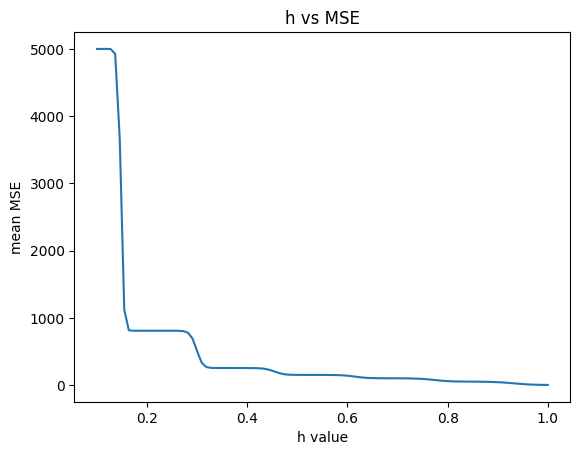

In [266]:
H=np.linspace(0.1,1,100)
bestH=perform_cv_for_h(X,y,H)

In [267]:
def perform_cv_for_lamb(X,y,H,k=4):
    mses=np.array([])
    for h in H:
        cv=KFold(n_splits=k,random_state=10,shuffle=True)
        loc_mse=np.array([])
        for train_index, test_index in cv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            idx=np.argsort(X_train)
            X_train=X_train[idx]
            y_train=y_train[idx]
            model=make_smoothing_spline(X,y,lam=h)
            y_pred=model(X_test)
            mse=mean_squared_error(y_test,y_pred)
            print(mse)
            loc_mse=np.append(loc_mse,mse)
        mses=np.append(mses,np.mean(loc_mse))
    plt.title("lambda vs MSE")
    plt.xlabel("lambda value")
    plt.ylabel("mean MSE")
    plt.plot(H,mses)
    idx=np.argmin(mses)
    return H[idx]

0.035224380556017884
0.0287151316210331
0.033475879363655155
0.04217045130838261
0.03743975458933066
0.030538013754817996
0.03520377063666133
0.0444717436690261
0.03951020778045302
0.03225735363365322
0.03680417113705269
0.04662778047087501
0.041450266971333215
0.033883581274434596
0.03829392313368597
0.04865704249571861
0.0432726601391283
0.035425683097033124
0.039686950511265896
0.0505747054811194
0.044988547316663165
0.036891440258872726
0.040994850206983235
0.052393349713307974
0.04660773258452878
0.038287625634030445
0.042227352564410625
0.05412350017108358
0.04813885112145729
0.039620165356835185
0.04339268042008167
0.055774039918321
0.049589530946974596
0.04089427108743717
0.04449783048441862
0.05735252874252053
0.05096653133721652
0.042114548485002234
0.045548795128265936
0.05886545070641308
0.05227586069476303
0.04328508647764979
0.046550738334820686
0.06031840805800418
0.05352287674643818
0.04440953105672504
0.047508136233305215
0.06171627437977479
0.05471237173370882
0.04549

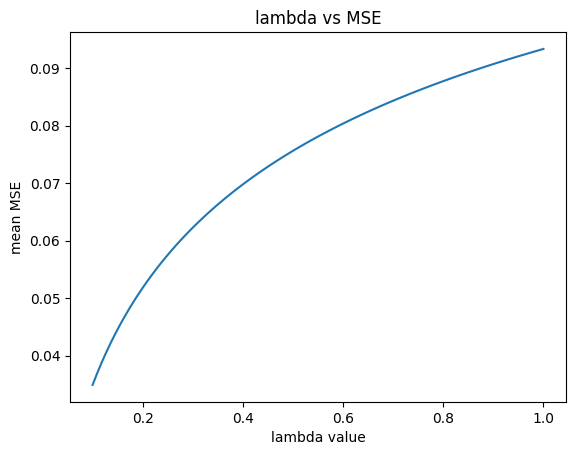

In [268]:
min_lamb=perform_cv_for_lamb(X,y,H)

In [ ]:
from sklearn.model_selection import train_test_split

In [271]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=10)

In [275]:
model1=NW_ker_estimator(0.5)
model1.fit(X_tr,y_tr)
model2=NW_ker_estimator(1)
model2.fit(X_te,y_te)

In [284]:
mean_squared_error(model1.predict(X_te),y_te)

0.2552725807350788

In [286]:
model1.predict(X_te)

array([71.35055665, 70.95086514, 70.59925695, 70.99999929, 69.59999937,
       71.09999946, 70.64987257, 70.45006157, 70.7498633 , 69.90037103,
       71.29986227, 71.49999929, 69.99950596, 70.30037054, 70.99999939,
       70.19999933, 70.90012346, 71.20197753, 69.50246608, 70.20024695])

In [287]:
model2.predict(X_te)

array([71.29999982, 71.29999982, 70.32791448, 70.27347787, 70.22384043,
       71.33812797, 70.39999982, 71.16849579, 70.12676928, 70.37615926,
       71.33703423, 71.38776811, 69.49999989, 69.79999982, 70.69999982,
       70.19999983, 70.69999982, 72.49999982, 69.49999989, 70.002202  ])

In [288]:
y_te

array([71.3, 71.3, 70.2, 70.5, 70.2, 71.4, 70.4, 71.3, 69.9, 70.4, 71.2,
       71.5, 69.5, 69.8, 70.7, 70.2, 70.7, 72.5, 69.5, 70. ])

In [289]:
spline=make_smoothing_spline(X,y,lam=min_lamb)
model=NW_ker_estimator(bestH)
model.fit(X,y)
X_lin=np.linspace(np.min(X),np.max(X),1000)

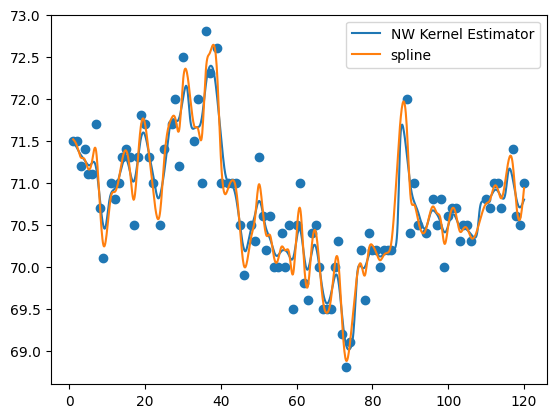

In [290]:
plt.scatter(X,y)
plt.plot(X_lin,model.predict(X_lin),label='NW Kernel Estimator')
plt.plot(X_lin,spline(X_lin),label="spline")
plt.legend()
plt.show()

# TASK 2


In [103]:
def gen_data(n=1000):
    X_1=0.25*np.random.normal(-1,0.2,n)+0.25*np.random.normal(1,0.2,n)+0.5*np.random.normal(5,0.2,n)
    X_rest=np.random.normal(0,1,size=(1000,9))
    Y=np.zeros(n)
    for i in range(n):
        p=np.random.uniform(0,1)
        if X_1[i]<3:
            Y[i]=1 if p>0.9 else 0
        else:
            Y[i]=1 if p>0.1 else 0
    X=np.column_stack((X_1,X_rest))
    return X ,Y

In [121]:
X,y=gen_data()

In [122]:
np.unique(y,return_counts=True)

(array([0., 1.]), array([906,  94]))

## TASK 3
gradient : $$ -\sum_i^n ||x_i||_{\infty  }(y_i x_i -\sigma (x_i^T \theta )x_i ) + 0.02 \theta $$

In [234]:
class GD_logistic_reg:
    def __init__(self,lr=0.01,it=1000):
        self.lr = lr
        self.it=it
        self.theta=None
        self.thetas_mat=None
        
    def _sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def _Risk(self,X,y,it=None):
        if it is None:
            th=self.theta
        else:
            th=self.thetas_mat[:,it].reshape(-1,1)
        n_samples=X.shape[0]
        risk=0
        for i in range(n_samples):
            z=np.dot(X[i],th)
            sigma=self._sigmoid(z)
            x_max=np.max(np.abs(X[i]))
            # small const added to log- ommiting negative 
            risk-=x_max*(y[i]*z+np.log(1-sigma+1e-9))
        risk=risk/n_samples
        risk+=0.01*np.dot(th.T,th)[0][0]
        return risk
    def _gradient(self,X,y,th):
        grad=np.zeros_like(th)
        n_samples=X.shape[0]
        for i in range(n_samples):
            z=np.dot(X[i],th)
            sigma=self._sigmoid(z)
            x_max=np.max(np.abs(X[i]))
            x=X[i].reshape(-1,1)
            grad-=x_max*(y[i]*x-sigma*x)
        grad=grad/n_samples
        grad+=0.02*th
        return grad
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.theta=np.zeros(n_features).reshape(-1,1)
        self.thetas_mat=np.zeros((n_features,self.it+1))
        for i in range(self.it):
            grad=self._gradient(X,y,self.theta)
            self.theta-=self.lr*grad
            self.thetas_mat[:,i+1]=self.theta.reshape(-1,).copy()
        return self
    
    def predict(self,X,it=None):
        if it is None:
            th=self.theta
        else:
            th=self.thetas_mat[:,it].reshape(-1,1)
        z=np.dot(X,th)
        sigma=self._sigmoid(z)
        return np.where(sigma>0.5,1,0)
        
        

In [235]:
model=GD_logistic_reg()
X_train,y_train=gen_data()
model.fit(X_train,y_train)

In [236]:
def plot_risk(X,y,model):
    risks=[]
    for i in range(model.it+1):
        risk=model._Risk(X,y,i)
        print(model.thetas_mat[:,i])
        risks.append(risk)
    plt.plot(risks)

In [215]:
X_test,y_test=gen_data()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-2.55305203e-02  1.65097264e-04 -4.75973896e-04 -1.77085040e-04
  3.74268845e-04 -3.37776183e-05  3.15232076e-04  5.16686872e-04
  5.02456522e-04  1.03153181e-04]
[-5.00422738e-02  3.22235322e-04 -9.44144844e-04 -3.47483412e-04
  7.30251044e-04 -7.35699086e-05  6.24306067e-04  1.02103085e-03
  9.75441024e-04  2.02292647e-04]
[-0.07357786  0.00047176 -0.00140478 -0.00051148  0.00106875 -0.00011908
  0.00092745  0.0015135   0.00142026  0.00029759]
[-0.09617968  0.00061403 -0.00185815 -0.00066935  0.00139056 -0.00017
  0.00122491  0.00199459  0.00183821  0.00038923]
[-0.11788953  0.00074939 -0.00230454 -0.00082138  0.00169648 -0.00022606
  0.00151691  0.00246476  0.00223059  0.00047738]
[-0.13874831  0.00087819 -0.00274424 -0.00096785  0.0019873  -0.00028697
  0.0018037   0.00292451  0.00259865  0.00056223]
[-0.15879576  0.00100077 -0.00317753 -0.00110904  0.00226378 -0.00035245
  0.00208551  0.00337431  0.00294363  0.00064395]
[-0.17807029  0.00111744 -0.

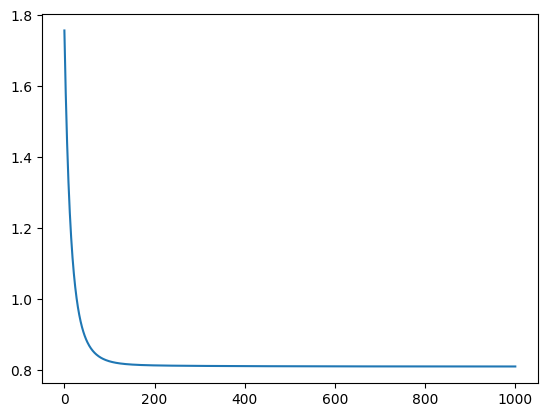

In [237]:
plot_risk(X_train,y_train,model)

In [238]:
def plot_accuracy(X,y,model):
    accs=[]
    for i in range(model.it+1):
        y_pred=model.predict(X,it=i)
        #print(model.thetas_mat[:,i])
        accs.append(np.mean(y_pred==y))
    plt.plot(accs)

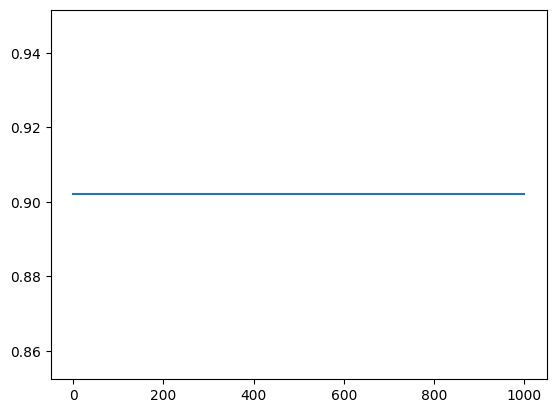

In [239]:
plot_accuracy(X_train,y_train,model)

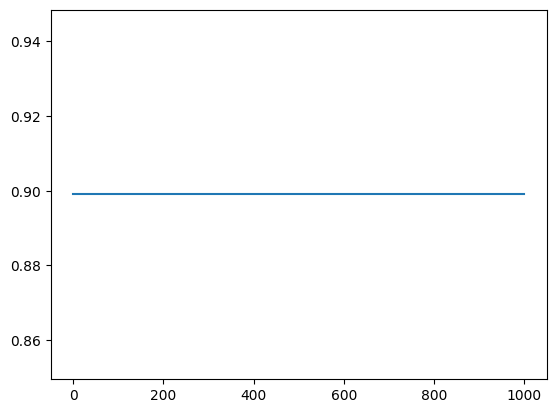

In [240]:
plot_accuracy(X_test,y_test,model)

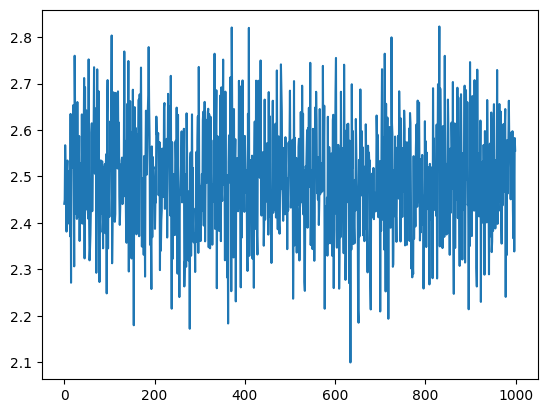

In [296]:
plt.plot(X_train[:,0])